In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [4]:
X = df.iloc[:, 0:3].values
y = df.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Residual
ypred_test = model.predict(X_test)
ypred_test

array([18162.52989713, 12926.63232172, 18053.10980298, 23644.64667624,
       20704.3837432 , 14282.27997119, 14944.93548437, 21382.32980945,
       21175.08238467, 12731.1046084 , 24003.12134284,  7215.44071046,
       12247.62152263, 19243.45998154, 19382.41854276, 13456.43797846,
       19624.70890281,  9253.16480346, 21132.68075408, 20907.62407719,
       15534.85444505, 10925.29368935, 22829.55183548, 15812.24380449,
       17425.15748642,  8162.18669332, 11897.83443827, 12703.37574955,
       21741.38084615,  7962.15367769, 12500.99965128, 20455.35281959,
        4721.20046536,  4722.59287861, 16752.92332907, 15758.04986054,
        6744.15498626, 17734.77354412,  9015.91826856, 13617.59900268])

## 1. Linear Relationship

In [8]:
residual = y_test - ypred_test

Text(0.5, 1.0, 'sales1')

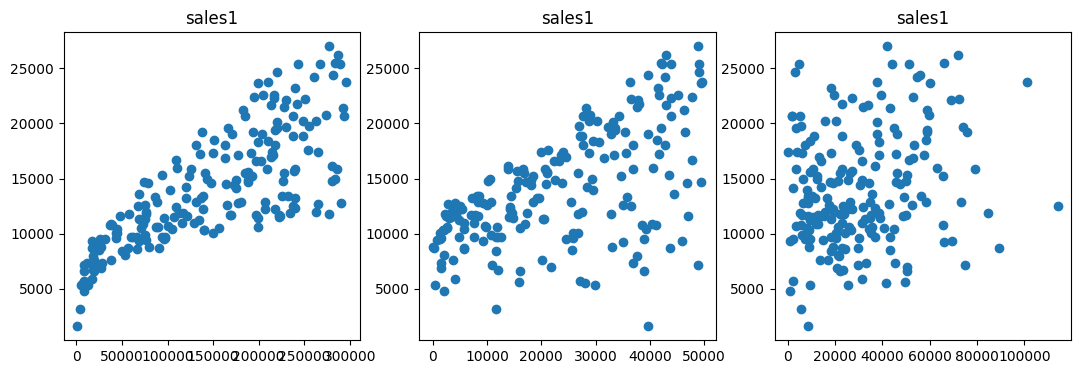

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 4))
ax1.scatter(df['TV'], df['sales'])
ax1.set_title('sales1')
ax2.scatter(df['radio'], df['sales'])
ax2.set_title('sales1')
ax3.scatter(df['newspaper'], df['sales'])
ax3.set_title('sales1')

### with the help of this graph, I can visualize that is there any linear relationship between input and output variable or not.
>

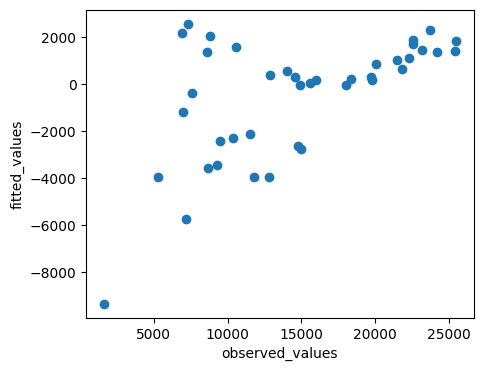

In [10]:
plt.figure(figsize=(5, 4))
residual = y_test - ypred_test
plt.scatter(y_test, residual)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

## 2. Multicollinearity (VIF)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

pd.DataFrame({'vif':vif}, index=df.columns[0:3]).T

,TV,radio,newspaper
vif,2.648315,3.058519,2.978917


## 3. Normality of Errors

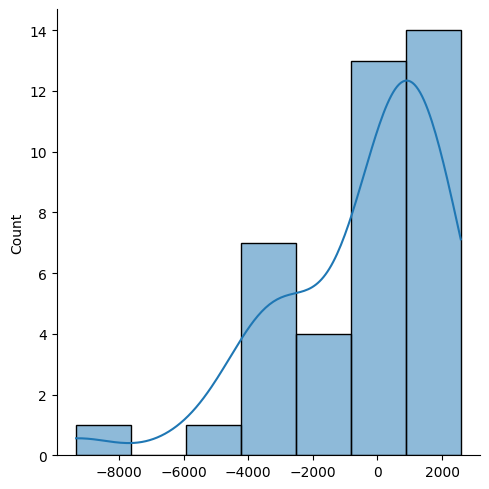

In [12]:
sns.displot(residual, kde='True')
plt.show()

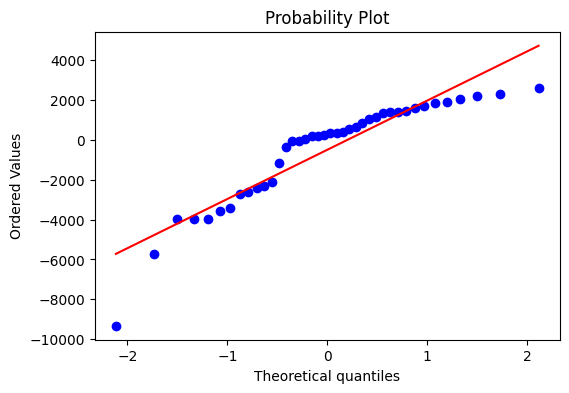

In [13]:
# QQ plot
import scipy as sp
fig, ax = plt.subplots(figsize=(6, 4))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

## 4. Homoscadescity

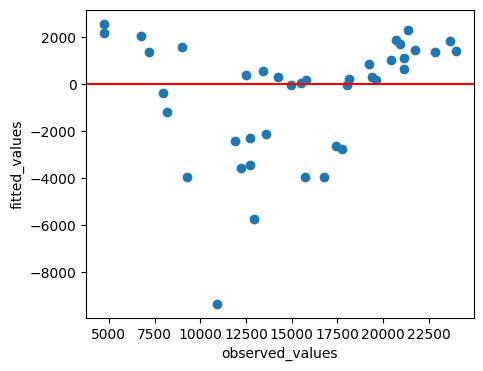

In [14]:
plt.figure(figsize=(5, 4))
residual = y_test - ypred_test
plt.scatter(ypred_test, residual)
plt.axhline(y=0, color='red')
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

## 5. No Autocorrelation of Error

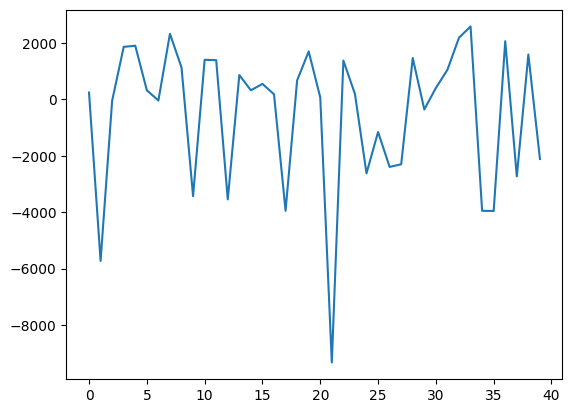

In [15]:
plt.plot(residual)

In [19]:
# Residual
ypred_train = model.predict(X_train)
ypred_train
residual = y_train - ypred_train

In [ ]:
import seaborn as sns
import pandas as pd

# Create a dataframe
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

# Create a pairplot
sns.pairplot(df)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [24]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000
